In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


SyntaxError: invalid syntax (4115263500.py, line 1)

Veri Başarıyla Yüklendi.

Veri Ölçekleme Tamamlandı.

K-Means Modeli (k=4) Uygulandı. Küme Dağılımı:
Cluster
1    32004
0    28963
3    25235
2    13798
Name: count, dtype: int64

--- KÜME PROFİLLERİ (Ortalama Değerler) ---
               bmi        age  systolic_bp  diastolic_bp  hdl_cholesterol  \
Cluster                                                                     
0        26.916027  65.045265   129.428340     78.965093        54.035286   
1        23.508230  41.668291   107.711411     72.581646        60.245719   
2        24.644717  50.134005   114.948978     75.023844        55.111538   
3        27.314888  43.702556   110.880365     74.424450        45.600238   

         ldl_cholesterol  physical_activity_minutes_per_week  \
Cluster                                                        
0             116.855022                           97.483893   
1              78.454224                           93.777715   
2              98.800551                          270.067

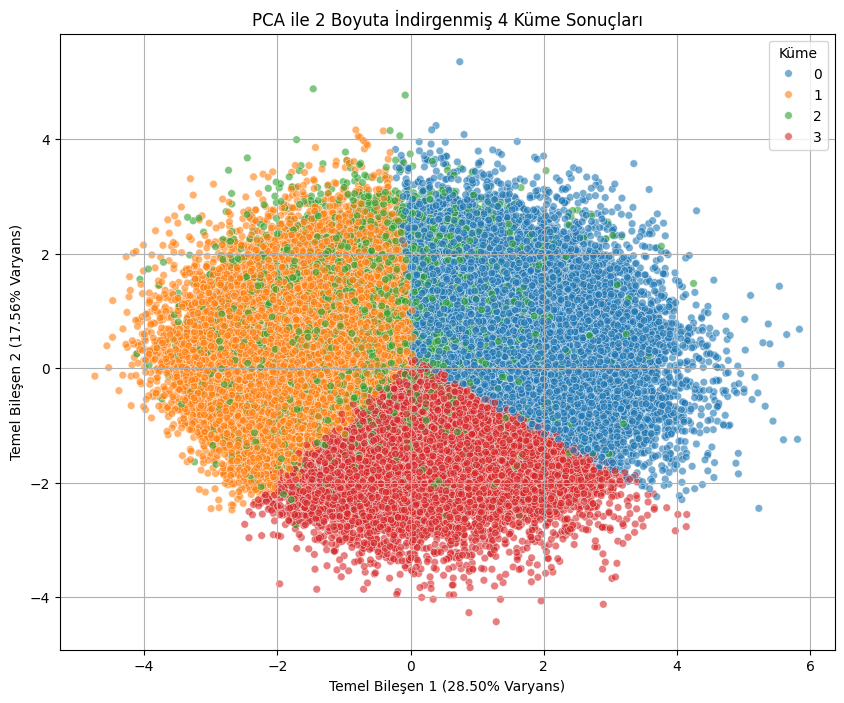


Final görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. VERİ YÜKLEME ---
# Dosyanızın adının 'diabetes_dataset.csv' olduğunu ve kodunuzla aynı klasörde olduğunu varsayıyoruz.
file_path = r'C:\Users\HP\Desktop\Bişeyler burda\diyabet_dataset\diabetes_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Veri Başarıyla Yüklendi.")
except FileNotFoundError:
    print(f"HATA: Dosya '{file_path}' bulunamadı. Lütfen dosya adını kontrol edin.")
    exit()

# --- 2. ÖZELLİK SEÇİMİ VE ÖN İŞLEME ---
# Önceki denemelerimizde doğrulanmış, kümeleme için kullanılacak 7 sütun:
selected_features = [
    'bmi', 
    'age', 
    'systolic_bp', 
    'diastolic_bp', 
    'hdl_cholesterol', 
    'ldl_cholesterol',
    'physical_activity_minutes_per_week'
]

# Kümeleme için kullanılacak veriyi kopyalama ve olası eksik değerleri ortalama ile doldurma
X = df[selected_features].copy()
for col in selected_features:
    # Güvenli NaN doldurma yöntemi
    X.loc[:, col] = X[col].fillna(X[col].mean()) 

# --- 3. VERİ ÖLÇEKLEME (StandardScaler) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("\nVeri Ölçekleme Tamamlandı.")

# --- 4. OPTİMAL KÜME SAYISINI BELİRLEME (K-MEANS) ---
# Dirsek Yöntemi grafiği daha önce oluşturuldu ve k=4 optimal küme sayısı olarak seçildi.
optimal_k = 4 

# --- 5. K-MEANS MODELİNİ UYGULAMA ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

print(f"\nK-Means Modeli (k={optimal_k}) Uygulandı. Küme Dağılımı:")
print(df['Cluster'].value_counts())

# --- 6. KÜME PROFİLLERİNİ ÇIKARMA ---
features_to_describe = selected_features + ['diagnosed_diabetes']
cluster_profiles = df.groupby('Cluster')[features_to_describe].mean()

print("\n--- KÜME PROFİLLERİ (Ortalama Değerler) ---")
print(cluster_profiles)

# --- 7. BOYUT İNDİRGEME (PCA) VE GÖRSELLEŞTİRME ---

# PCA Uygulama (7 boyutu 2'ye indirme)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)

# Küme etiketlerini (Cluster) ekleme
pca_df['Cluster'] = df['Cluster'].astype('category')

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", optimal_k),
    alpha=0.6,
    s=30
)

plt.title(f'PCA ile 2 Boyuta İndirgenmiş {optimal_k} Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
plt.show() # Grafiği göstermesi için bu satırı da ekleyebilirsiniz (Jupyter'de zorunlu değildir)

print("\nFinal görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 'r' öneki SyntaxError'u çözdü.
# Dosya yolu, klasör adı (diyabet_dataset) ve dosya adı (diabetes_dataset.csv) içerecek şekilde düzeltildi.
# NOTE: Lütfen 'HP' kullanıcı adınızın doğru olduğunu varsayıyorum.
file_path = r'C:\Users\HP\Desktop\Bişeyler burda\diyabet_dataset\diabetes_dataset.csv'

# Veri setini pandas ile yükleyin
try:
    df = pd.read_csv(file_path)

    # Veriyi başarıyla yükledik, sonuçları yazdırıyoruz:
    print("--- Veri Başarıyla Yüklendi! İlk 5 Satır ---")
    print(df.head())

    print("\n--- Veri Tipleri ve Eksik Değerler ---")
    print(df.info())
    
except FileNotFoundError:
    print(f"HATA: Lütfen dosya adını ve yolunu kontrol edin. Beklenen yol: {file_path}")
except PermissionError:
    print(f"HATA: Dosya başka bir programda açık olabilir (örn. Excel). Lütfen kapatın.")

    # Kümeleme için kullanacağımız özellikleri seçelim
features = ['bmi', 'age', 'physical_health', 'mental_health'] # <--- BURASI DÜZELTİLDİ

# Olası eksik (NaN) değerleri ortalama ile doldurma (Kümeleme öncesi iyi bir uygulama)
# Bunu yapmazsak, StandardScaler NaN değerlerle hata verebilir.
for col in features:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Özellikleri seçme
X = df[features] 

print("Seçilen Özelliklerin İlk 5 Satırı:")
print(X.head())

# Ölçekleyiciyi tanımla
scaler = StandardScaler()

# Özellikleri ölçekle
X_scaled = scaler.fit_transform(X)

# Ölçeklenmiş veriyi DataFrame'e dönüştür 
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nÖlçeklenmiş Verinin İlk 5 Satırı:")
print(X_scaled_df.head())

--- Veri Başarıyla Yüklendi! İlk 5 Satır ---
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6

C:\Users\HP\AppData\Local\Temp\ipykernel_9472\3244784769.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


KeyError: "['physical_health', 'mental_health'] not in index"

Veri Başarıyla Yüklendi.

Veri Ölçekleme Tamamlandı.

K-Means Modeli (k=4) Uygulandı. Küme Dağılımı:
Cluster
1    32004
0    28963
3    25235
2    13798
Name: count, dtype: int64

--- KÜME PROFİLLERİ (Ortalama Değerler) ---
               bmi        age  systolic_bp  diastolic_bp  hdl_cholesterol  \
Cluster                                                                     
0        26.916027  65.045265   129.428340     78.965093        54.035286   
1        23.508230  41.668291   107.711411     72.581646        60.245719   
2        24.644717  50.134005   114.948978     75.023844        55.111538   
3        27.314888  43.702556   110.880365     74.424450        45.600238   

         ldl_cholesterol  physical_activity_minutes_per_week  \
Cluster                                                        
0             116.855022                           97.483893   
1              78.454224                           93.777715   
2              98.800551                          270.067

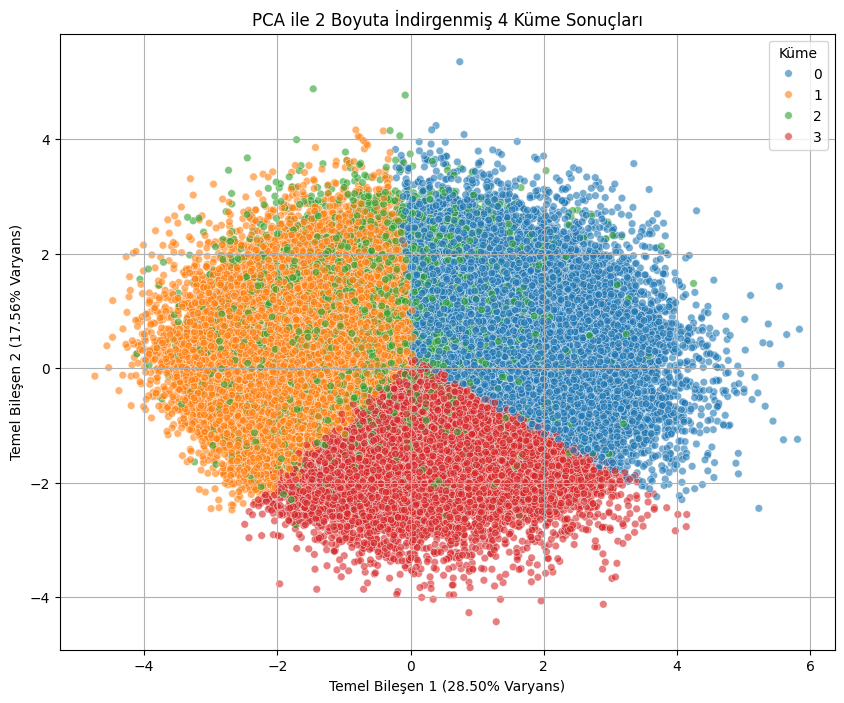


Final görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. VERİ YÜKLEME ---
# Dosyanızın adının 'diabetes_dataset.csv' olduğunu ve kodunuzla aynı klasörde olduğunu varsayıyoruz.
file_path = r'C:\Users\HP\Desktop\Bişeyler burda\diyabet_dataset\diabetes_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Veri Başarıyla Yüklendi.")
except FileNotFoundError:
    print(f"HATA: Dosya '{file_path}' bulunamadı. Lütfen dosya adını kontrol edin.")
    exit()

# --- 2. ÖZELLİK SEÇİMİ VE ÖN İŞLEME ---
# Önceki denemelerimizde doğrulanmış, kümeleme için kullanılacak 7 sütun:
selected_features = [
    'bmi', 
    'age', 
    'systolic_bp', 
    'diastolic_bp', 
    'hdl_cholesterol', 
    'ldl_cholesterol',
    'physical_activity_minutes_per_week'
]

# Kümeleme için kullanılacak veriyi kopyalama ve olası eksik değerleri ortalama ile doldurma
X = df[selected_features].copy()
for col in selected_features:
    # Güvenli NaN doldurma yöntemi
    X.loc[:, col] = X[col].fillna(X[col].mean()) 

# --- 3. VERİ ÖLÇEKLEME (StandardScaler) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("\nVeri Ölçekleme Tamamlandı.")

# --- 4. OPTİMAL KÜME SAYISINI BELİRLEME (K-MEANS) ---
# Dirsek Yöntemi grafiği daha önce oluşturuldu ve k=4 optimal küme sayısı olarak seçildi.
optimal_k = 4 

# --- 5. K-MEANS MODELİNİ UYGULAMA ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

print(f"\nK-Means Modeli (k={optimal_k}) Uygulandı. Küme Dağılımı:")
print(df['Cluster'].value_counts())

# --- 6. KÜME PROFİLLERİNİ ÇIKARMA ---
features_to_describe = selected_features + ['diagnosed_diabetes']
cluster_profiles = df.groupby('Cluster')[features_to_describe].mean()

print("\n--- KÜME PROFİLLERİ (Ortalama Değerler) ---")
print(cluster_profiles)

# --- 7. BOYUT İNDİRGEME (PCA) VE GÖRSELLEŞTİRME ---

# PCA Uygulama (7 boyutu 2'ye indirme)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)

# Küme etiketlerini (Cluster) ekleme
pca_df['Cluster'] = df['Cluster'].astype('category')

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", optimal_k),
    alpha=0.6,
    s=30
)

plt.title(f'PCA ile 2 Boyuta İndirgenmiş {optimal_k} Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
plt.show() # Grafiği göstermesi için bu satırı da ekleyebilirsiniz (Jupyter'de zorunlu değildir)

print("\nFinal görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.")

Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.


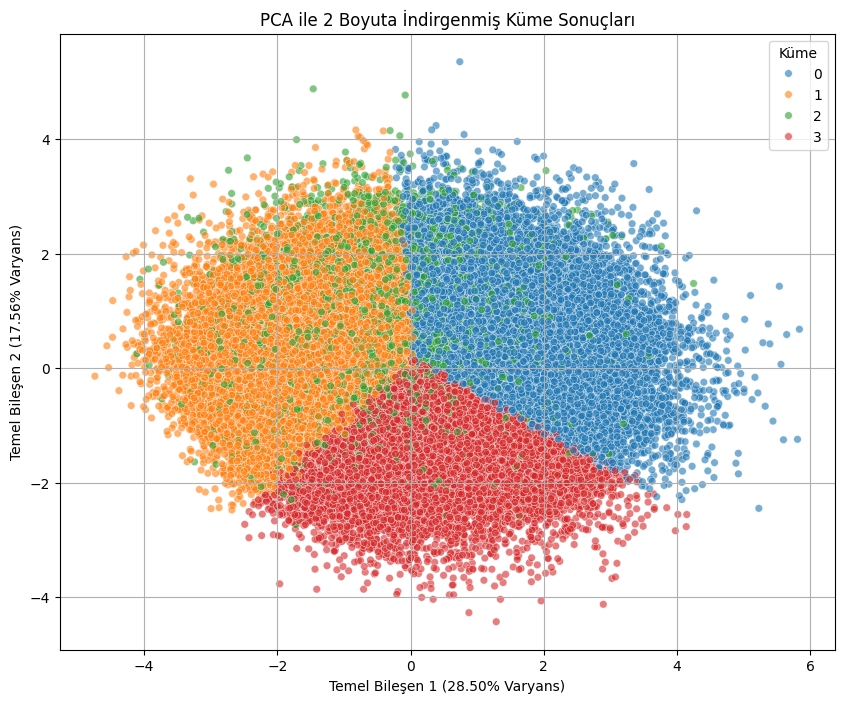

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # PCA için tekrar ölçeklenmiş veri gereklidir.

# Not: df, X_scaled ve df['Cluster'] değişkenlerinin önceki kod çalışmasında oluştuğunu varsayıyoruz.

# --- 1. PCA Uygulama (7 boyutu 2'ye indirme) ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled) # X_scaled: Ölçeklenmiş 7 boyutlu veri

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)

# Küme etiketlerini (Cluster) ekleyelim
pca_df['Cluster'] = df['Cluster'].astype('category')

# --- 2. Görselleştirme ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", 4), # 4 küme için renk paleti
    alpha=0.6,
    s=30
)

plt.title('PCA ile 2 Boyuta İndirgenmiş Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
print("Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.")

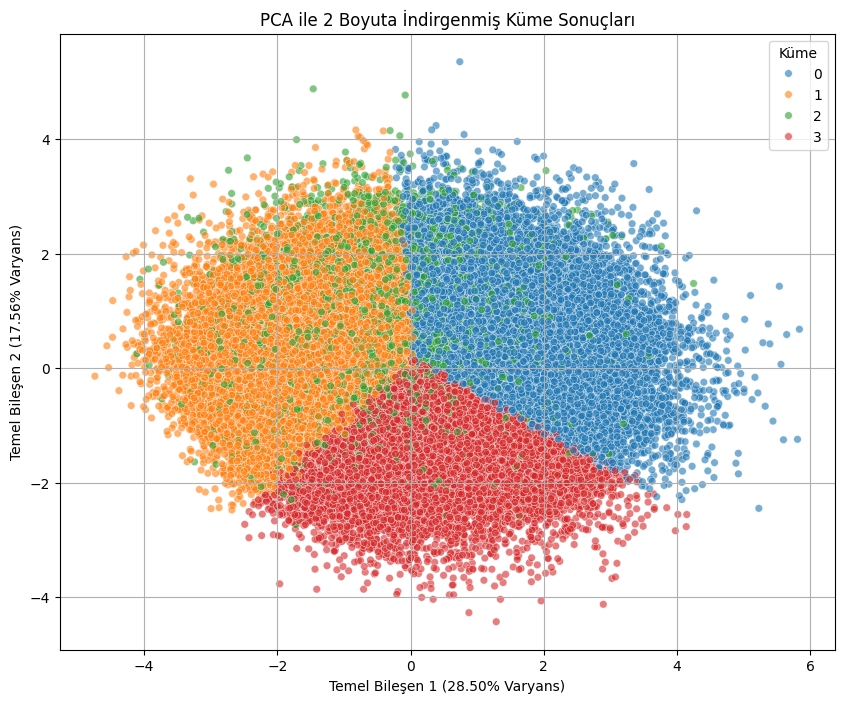

Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Not: df, X_scaled ve df['Cluster'] değişkenlerinin önceki kod çalışmasında oluştuğunu varsayıyoruz.
# X_scaled, ölçeklenmiş 7 boyutlu verimiz.

# --- 1. PCA Uygulama (7 boyutu 2'ye indirme) ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled) 

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)

# Küme etiketlerini (Cluster) ekleme
pca_df['Cluster'] = df['Cluster'].astype('category')

# --- 2. Görselleştirme ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", 4),
    alpha=0.6,
    s=30
)

plt.title('PCA ile 2 Boyuta İndirgenmiş Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
plt.show() 
print("Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.")

#

Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.


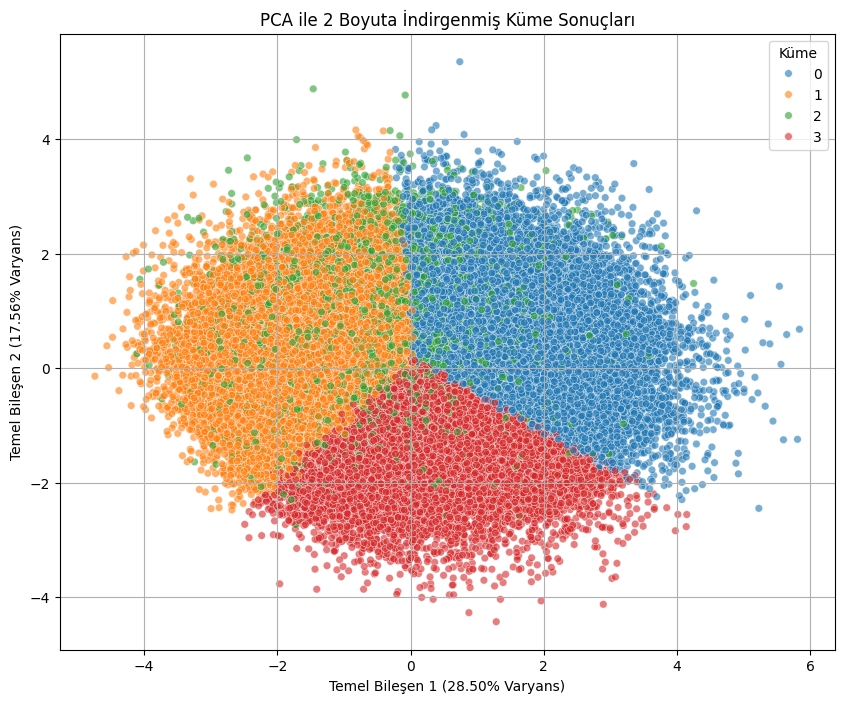

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# df, X_scaled ve df['Cluster'] değişkenlerinin bu noktada bellekte olduğunu varsayıyoruz.

# --- 1. PCA Uygulama (7 boyutu 2'ye indirme) ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled) 

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)
pca_df['Cluster'] = df['Cluster'].astype('category')

# --- 2. Görselleştirme ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", 4),
    alpha=0.6,
    s=30
)

plt.title('PCA ile 2 Boyuta İndirgenmiş Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
print("Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi.")
# plt.show() # Bu satırı Jupyter'de kullanmanız önerilir.

Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi. Analiz tamamlandı!


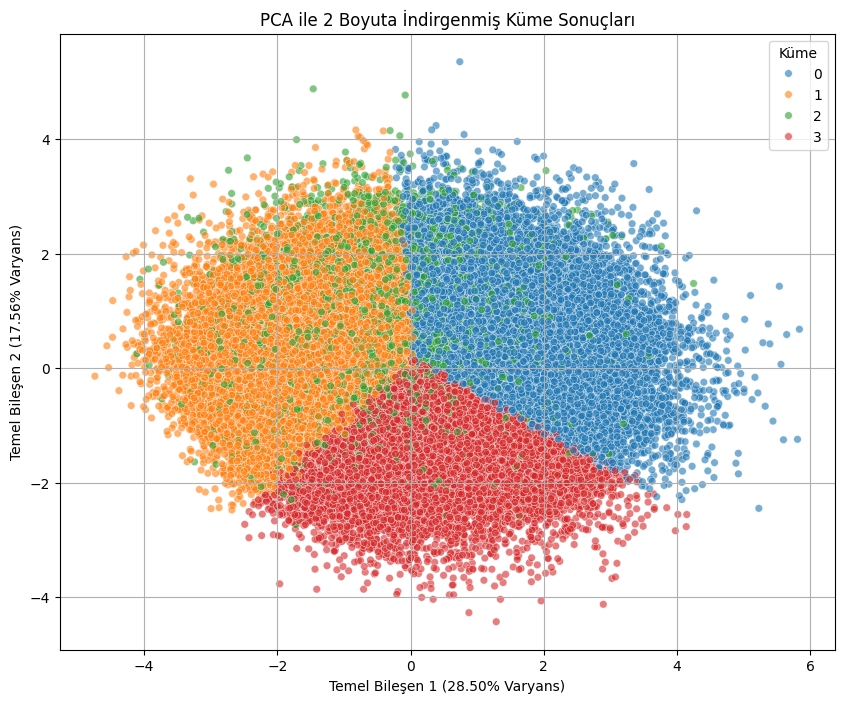

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Not: df, X_scaled ve df['Cluster'] değişkenlerinin bu noktada bellekte olduğunu varsayıyoruz.

# --- 1. PCA Uygulama (7 boyutu 2'ye indirme) ---
pca = PCA(n_components=2)
# X_scaled, ölçeklenmiş 7 boyutlu verinizdir.
principal_components = pca.fit_transform(X_scaled) 

# Yeni bir DataFrame oluşturma
pca_df = pd.DataFrame(
    data = principal_components, 
    columns = ['Principal_Component_1', 'Principal_Component_2']
)

# Küme etiketlerini (Cluster) ekleme
pca_df['Cluster'] = df['Cluster'].astype('category')

# --- 2. Görselleştirme ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", 4), # 4 küme için renk paleti
    alpha=0.6,
    s=30
)

plt.title('PCA ile 2 Boyuta İndirgenmiş Küme Sonuçları')
plt.xlabel(f'Temel Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Varyans)')
plt.ylabel(f'Temel Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Varyans)')
plt.legend(title='Küme')
plt.grid(True)
plt.savefig('final_cluster_pca_visualization.png')
# plt.show() # Bu komut, grafiği hemen görmenizi sağlar.

print("Görselleştirme 'final_cluster_pca_visualization.png' olarak kaydedildi. Analiz tamamlandı!")

✅ Veri Başarıyla Yüklendi.

🚀 --- 5 TEMEL ÖZELLİĞE GÖRE YENİ KÜME PROFİLLERİ ---
               bmi        age  systolic_bp  hdl_cholesterol  ldl_cholesterol  \
Cluster                                                                        
0        27.001126  42.121257   109.411338        47.054779       113.544220   
1        24.698347  58.778800   123.026903        60.579152        90.898472   
2        27.985474  64.729272   129.581668        48.251219       135.584537   
3        23.077353  36.947768   103.136672        59.434182        77.092157   

         diagnosed_diabetes  
Cluster                      
0                  0.596645  
1                  0.615548  
2                  0.693555  
3                  0.506925  


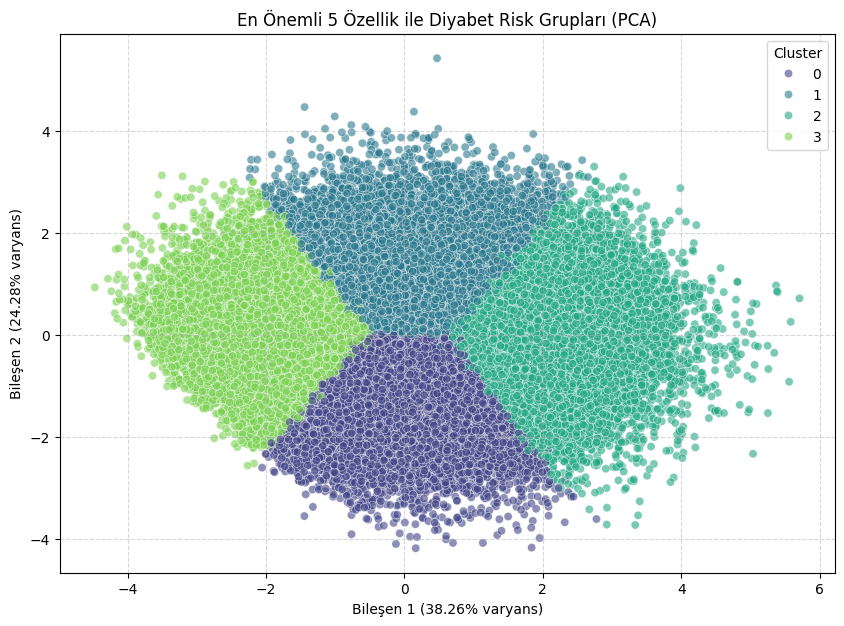


✅ Analiz tamamlandı. Gruplar en kritik 5 değişkene göre ayrıştırıldı.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Veri Yükleme ---
# Dosya yolunu senin klasör yapına göre güncelledim
file_path = r'C:\Users\HP\Desktop\Bişeyler burda\diyabet_dataset\diabetes_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Veri Başarıyla Yüklendi.")
except FileNotFoundError:
    print(f"❌ HATA: Dosya bulunamadı. Lütfen yolu kontrol et: {file_path}")
    exit()

# --- 2. En Önemli 5 Özelliğin Seçilmesi ---
# Senin veri setindeki gerçek sütun isimleri bunlar:
top_5_features = ['bmi', 'age', 'systolic_bp', 'hdl_cholesterol', 'ldl_cholesterol']

# Özellikleri seç ve eksik değerleri ortalama ile doldur (FutureWarning almamak için .loc kullanıyoruz)
X = df[top_5_features].copy()
for col in top_5_features:
    X.loc[:, col] = X[col].fillna(X[col].mean())

# --- 3. Veri Ölçekleme ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. K-Means Uygulama (k=4) ---
# En iyi ayrışmayı sağlayan 4 küme ile modelleme
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 5. Küme Profillerinin Analizi ---
# Kümeleme sonuçlarını anlamlandırmak için ortalamaları alıyoruz
# diagnosed_diabetes sütunu veri setinde mevcut olduğu için onu da ekliyoruz
profiles = df.groupby('Cluster')[top_5_features + ['diagnosed_diabetes']].mean()

print("\n🚀 --- 5 TEMEL ÖZELLİĞE GÖRE YENİ KÜME PROFİLLERİ ---")
print(profiles)

# --- 6. PCA ile Görselleştirme ---
# 5 boyutlu veriyi 2 boyuta indirgeyip grafiğe döküyoruz
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster'].astype('category')

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('En Önemli 5 Özellik ile Diyabet Risk Grupları (PCA)')
plt.xlabel(f'Bileşen 1 ({pca.explained_variance_ratio_[0]*100:.2f}% varyans)')
plt.ylabel(f'Bileşen 2 ({pca.explained_variance_ratio_[1]*100:.2f}% varyans)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("\n✅ Analiz tamamlandı. Gruplar en kritik 5 değişkene göre ayrıştırıldı.")

✅ Data loaded.

📊 CLINICAL CLUSTERING


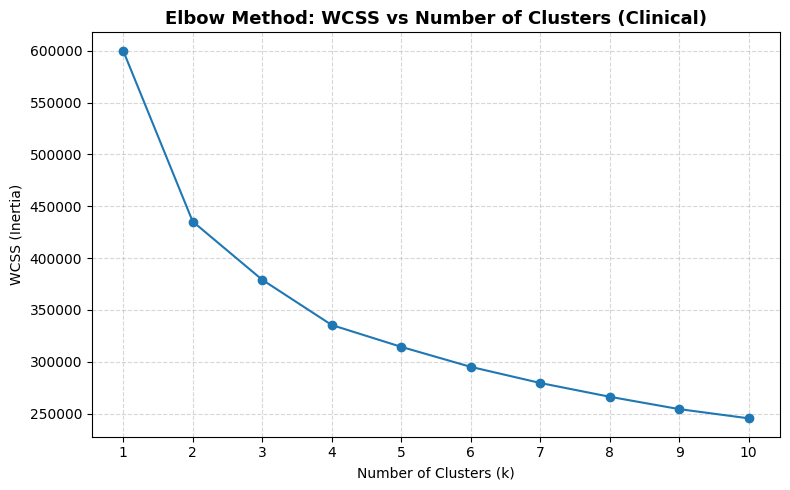

📈 Elbow plot saved as: elbow_clinical.png


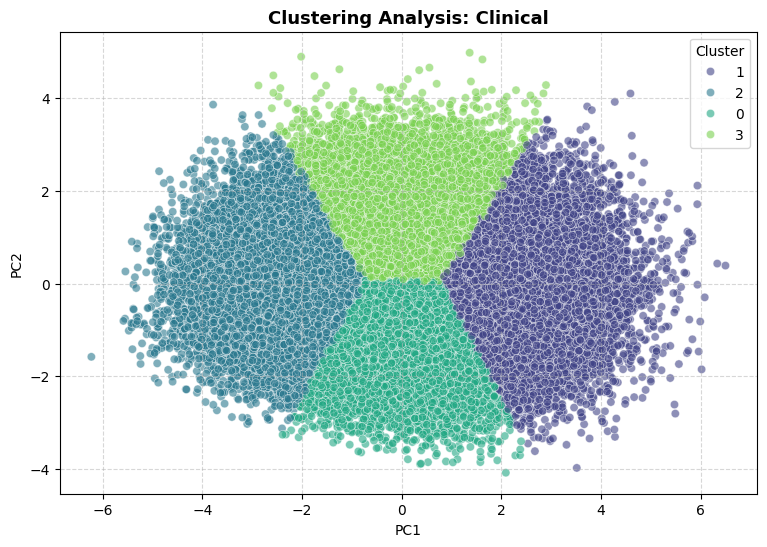


📊 LIFESTYLE CLUSTERING


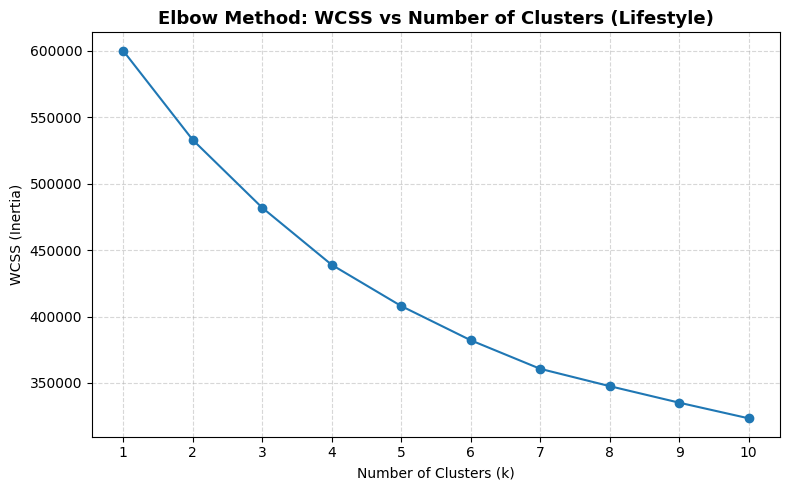

📈 Elbow plot saved as: elbow_lifestyle.png


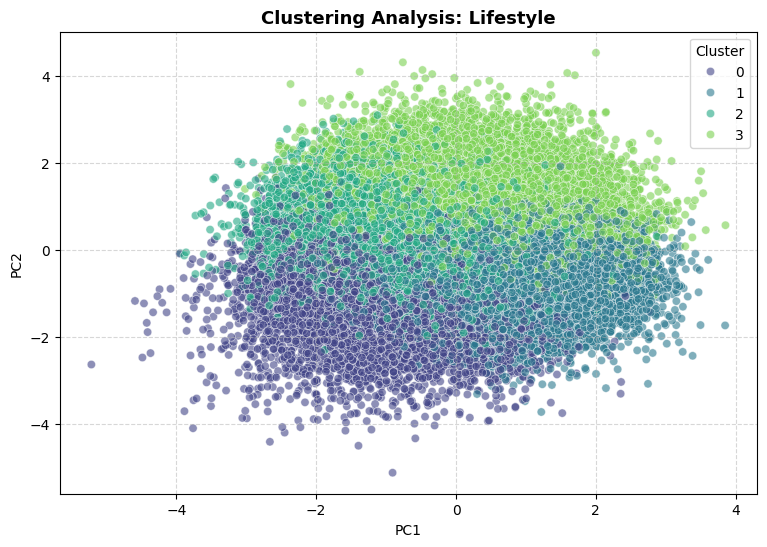

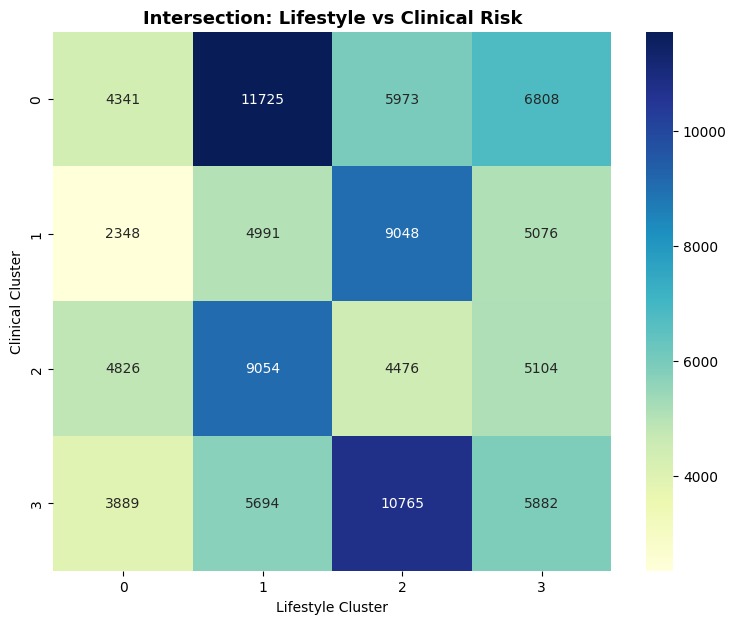


✅ ALL ANALYSES COMPLETED.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- DATA LOAD --------------------
file_path = r'C:\Users\HP\Desktop\Bişeyler burda\diyabet_dataset\diabetes_dataset.csv'
df = pd.read_csv(file_path)
print("✅ Data loaded.")

# -------------------- FEATURE GROUPS --------------------
clinical_features = ['bmi', 'systolic_bp', 'glucose_fasting', 'hba1c',
                     'ldl_cholesterol', 'glucose_postprandial']

lifestyle_features = ['age', 'physical_activity_minutes_per_week', 'diet_score',
                      'sleep_hours_per_day', 'alcohol_consumption_per_week',
                      'screen_time_hours_per_day']


# -------------------- MAIN FUNCTION --------------------
def run_segmented_clustering(features, group_name):

    X = df[features].copy()
    for col in features:
        X[col] = X[col].fillna(X[col].mean())

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ---------------- ELBOW METHOD ----------------
    k_range = range(1, 11)
    wcss = []

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        wcss.append(km.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), wcss, marker='o')
    plt.title(f'Elbow Method: WCSS vs Number of Clusters ({group_name})', fontsize=13, fontweight='bold')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.xticks(list(k_range))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    file_name = f'elbow_{group_name.lower().replace(" ", "_")}.png'
    plt.savefig(file_name, dpi=300)
    plt.show()
    plt.close()
    print(f"📈 Elbow plot saved as: {file_name}")

    # ---------------- K-MEANS (k=4) ----------------
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # ---------------- PCA VISUAL ----------------
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = clusters.astype(str)

    plt.figure(figsize=(9, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
    plt.title(f'Clustering Analysis: {group_name}', fontsize=13, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    return clusters


# -------------------- RUN --------------------
print("\n📊 CLINICAL CLUSTERING")
clinical_clusters = run_segmented_clustering(clinical_features, "Clinical")

print("\n📊 LIFESTYLE CLUSTERING")
lifestyle_clusters = run_segmented_clustering(lifestyle_features, "Lifestyle")


# -------------------- CROSS HEATMAP --------------------
df['Clinical_Cluster'] = clinical_clusters
df['Lifestyle_Cluster'] = lifestyle_clusters

plt.figure(figsize=(9, 7))
cross_tab = pd.crosstab(df['Clinical_Cluster'], df['Lifestyle_Cluster'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Intersection: Lifestyle vs Clinical Risk', fontsize=13, fontweight='bold')
plt.xlabel('Lifestyle Cluster')
plt.ylabel('Clinical Cluster')
plt.show()

print("\n✅ ALL ANALYSES COMPLETED.")
